# Start

In [1]:
import matplotlib as mpl
mpl.use('Agg')

In [2]:
%run max-profit.py

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import pandas as pd
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
%config InlineBackend.figure_format = 'png'

mpl.rcParams['figure.dpi']= 300


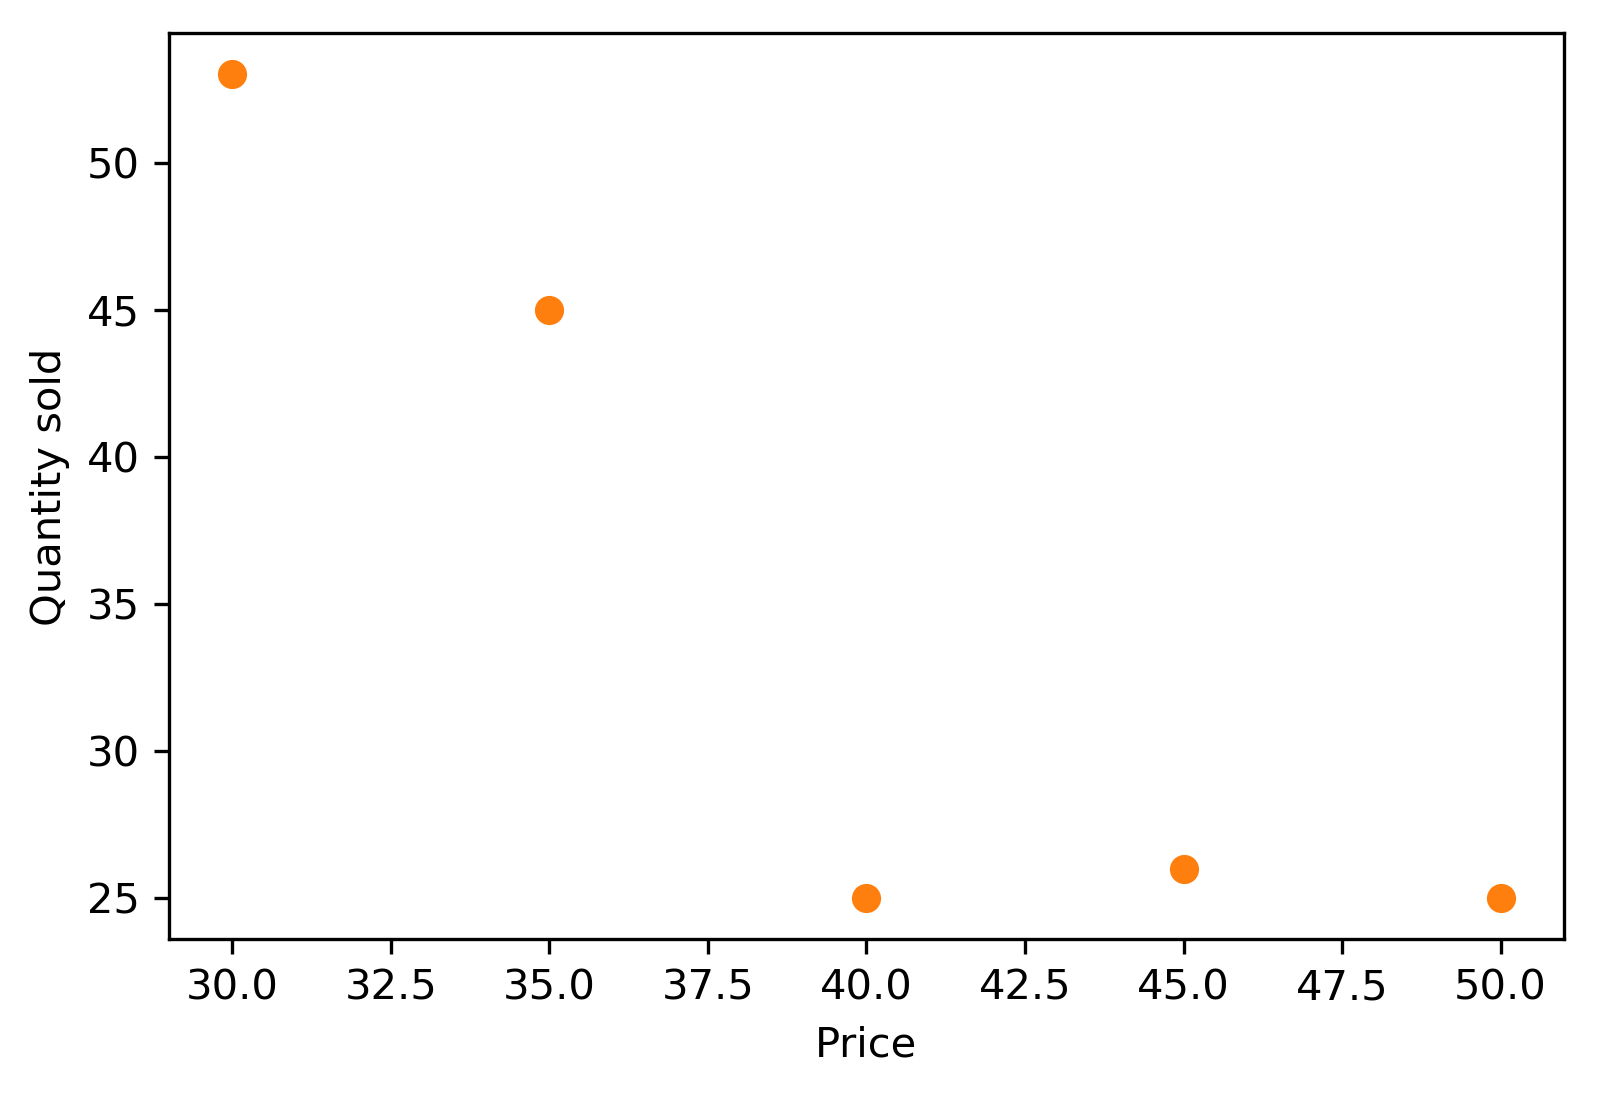

In [5]:
np.random.seed(42)
a = 50000
k = 20
c = -2
p  = np.linspace(25,55)
p0 = np.linspace(30,50,5)
eq = a * p**c
q0 = np.random.poisson(a * p0**c)
π = eq * (p - k)

# np.log(prices-k) + np.log(a) + c*np.log(prices)

#plt.plot(p,π);
plt.plot(p0,q0,'o',c='C1');
plt.xlabel('Price')
plt.ylabel('Quantity sold')
savefig("q0")

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, loga]
100%|██████████| 1000/1000 [00:03<00:00, 291.75it/s]
INFO (theano.gof.compilelock): Waiting for existing lock by process '10583' (I am process '10584')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/chad/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.3-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '10583' (I am process '10585')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/chad/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.3-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '10584' (I am process '10585')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/chad/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.3-64/lock_

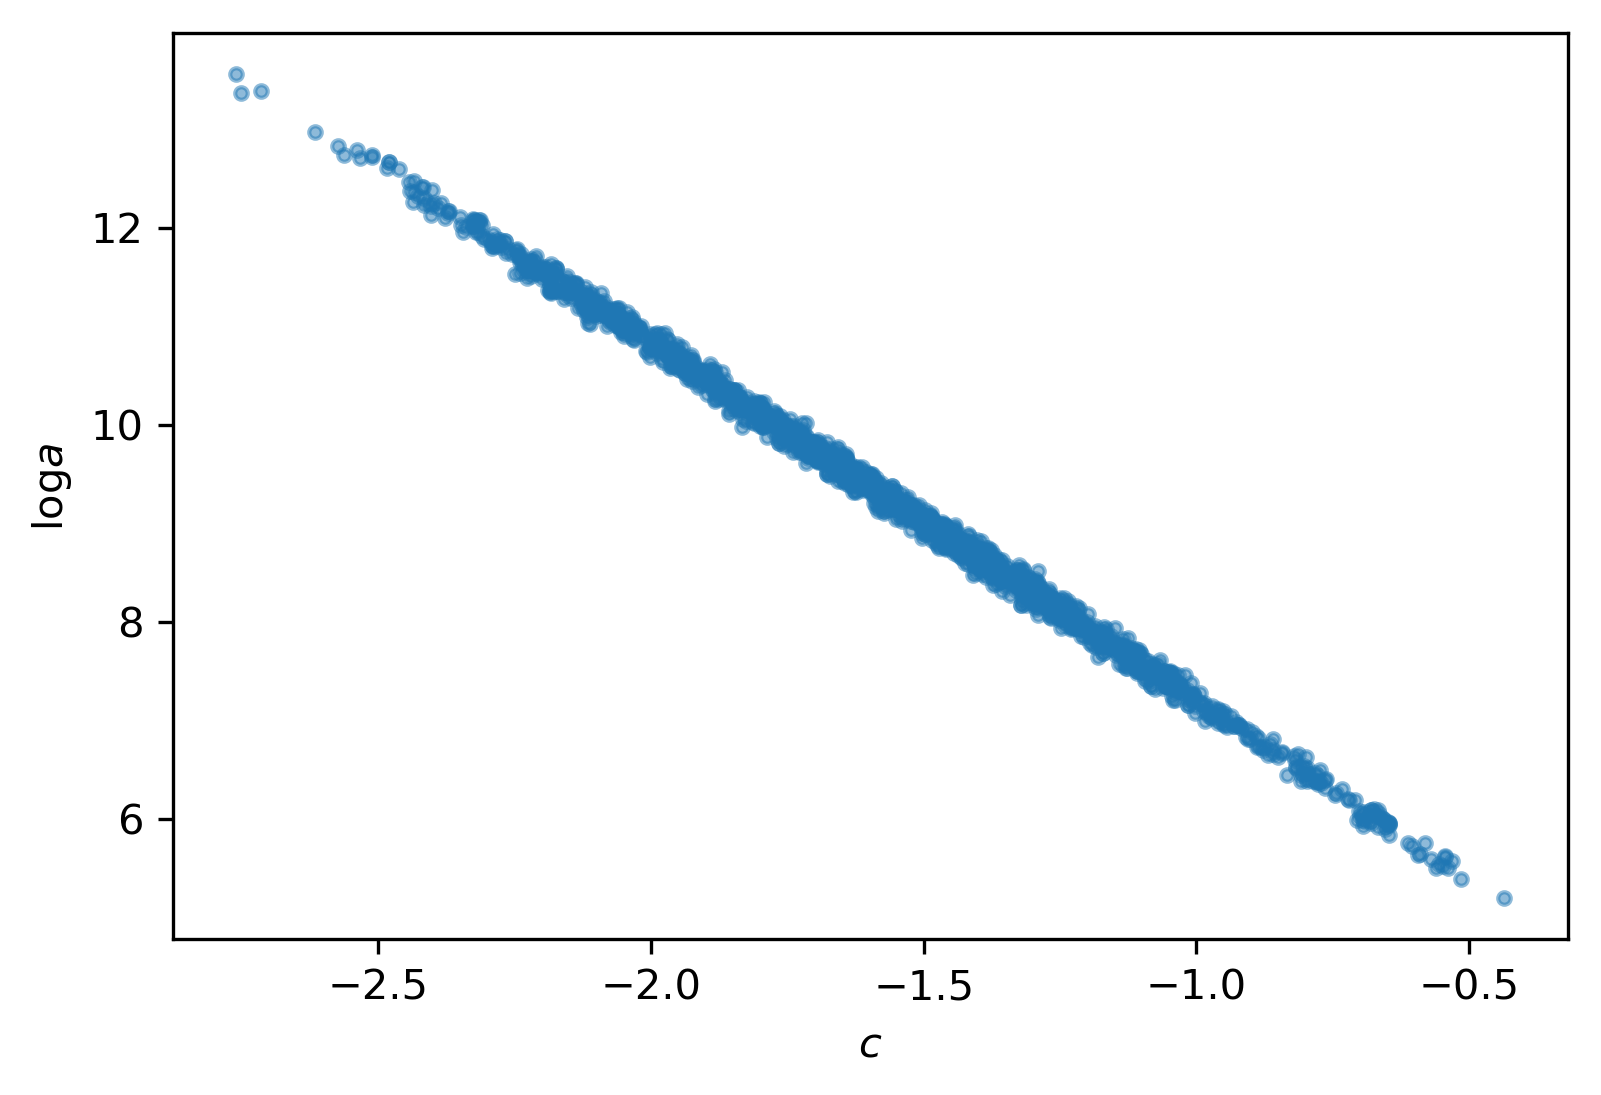

In [6]:
trace = fit0(p0,q0)
plt.plot(trace['c'],trace['loga'],'.',alpha=0.5)
plt.xlabel('$c$')
plt.ylabel('$\log a$')
savefig("uncentered")

In [7]:
t = fit(p0,q0)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]
100%|██████████| 1000/1000 [00:00<00:00, 1421.50it/s]


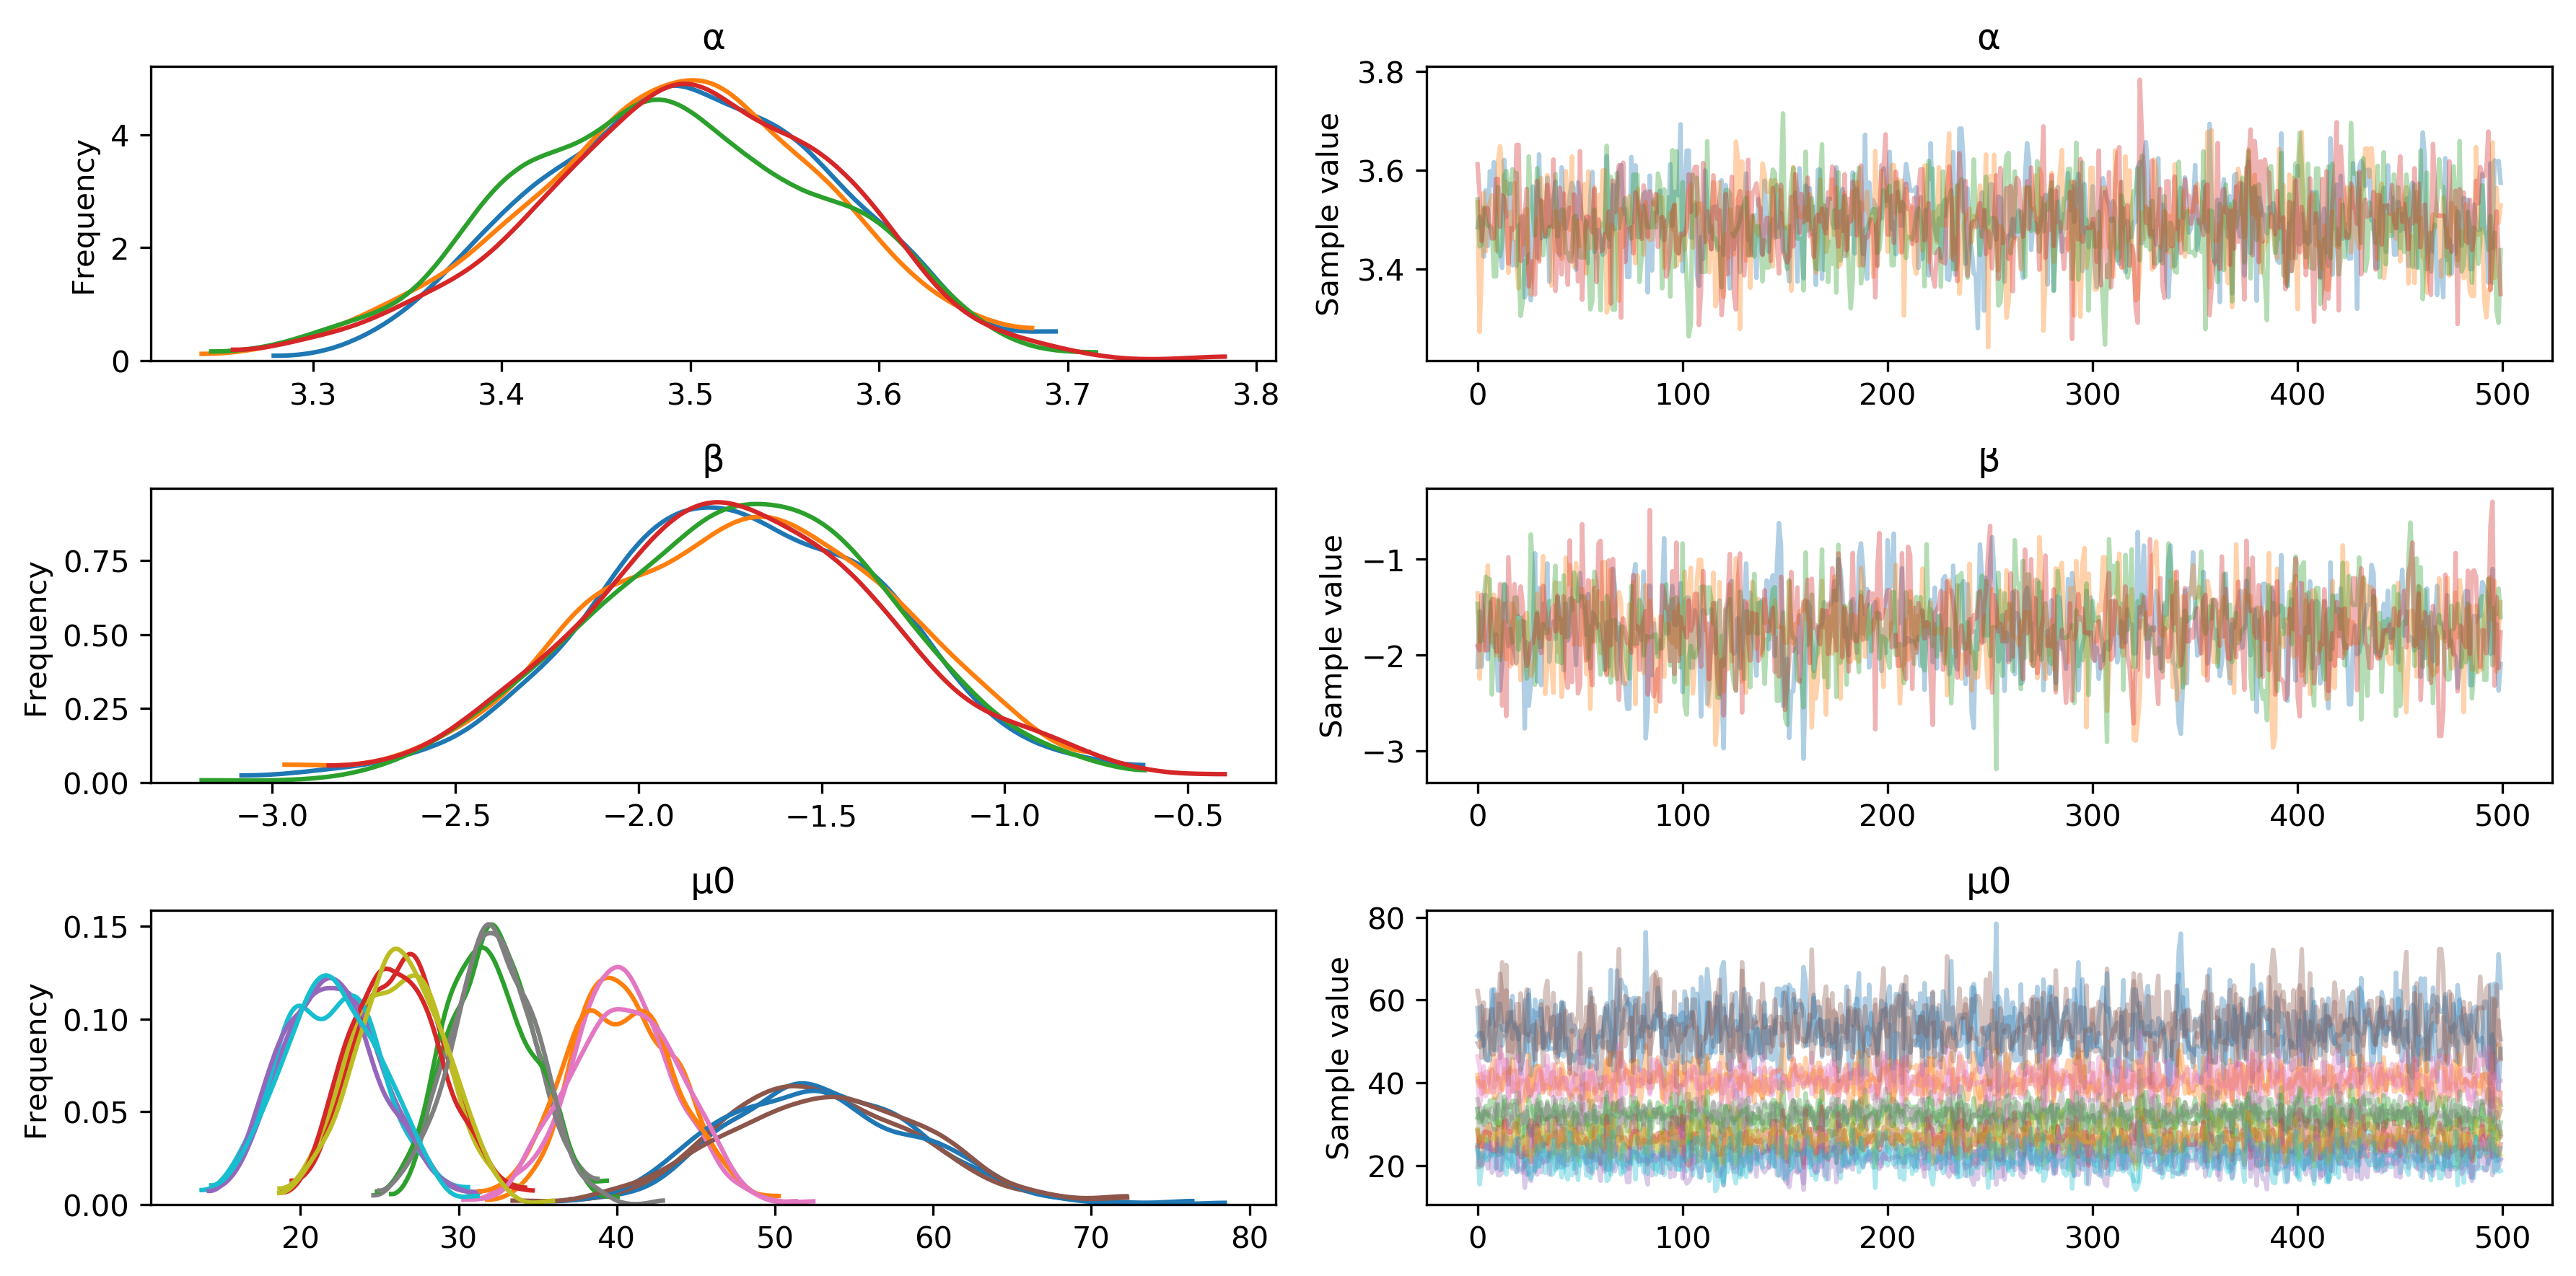

In [8]:
pm.traceplot(t);
savefig("traceplot")

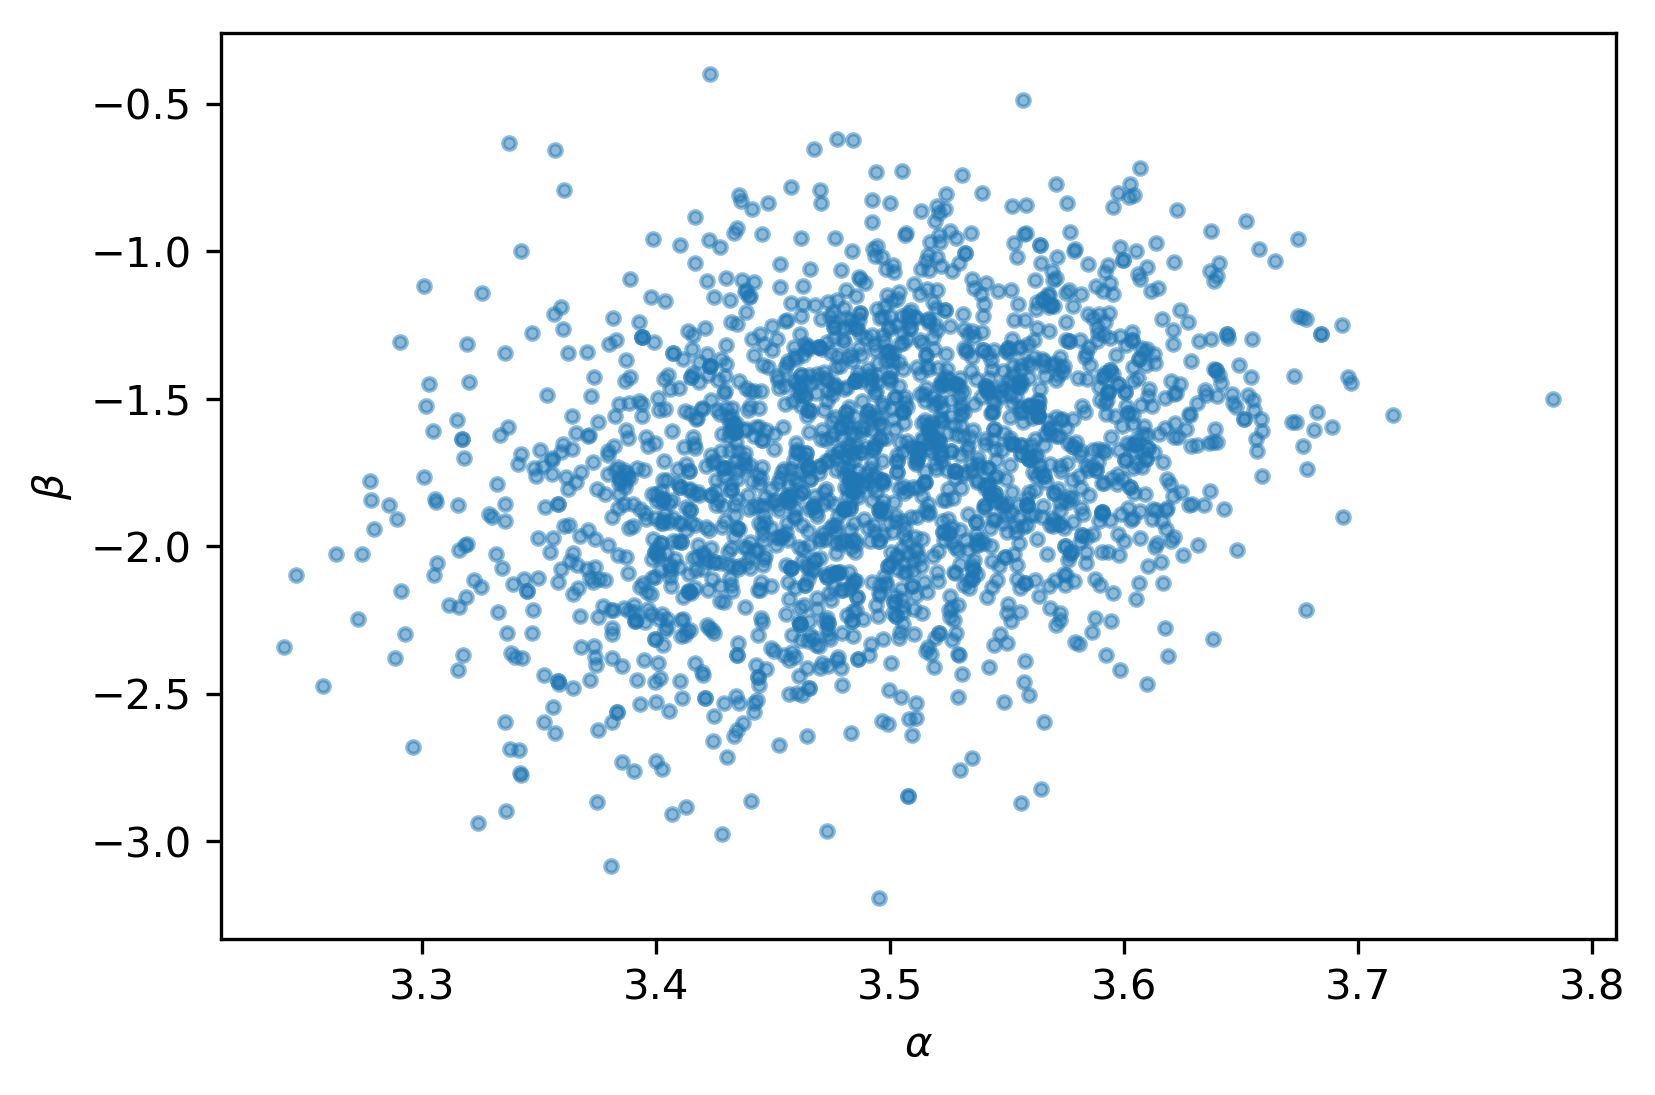

In [9]:
plt.plot(t['α'],t['β'],'.',alpha=0.5);
plt.xlabel('$\\alpha$')
plt.ylabel('$\\beta$')
savefig('centered')

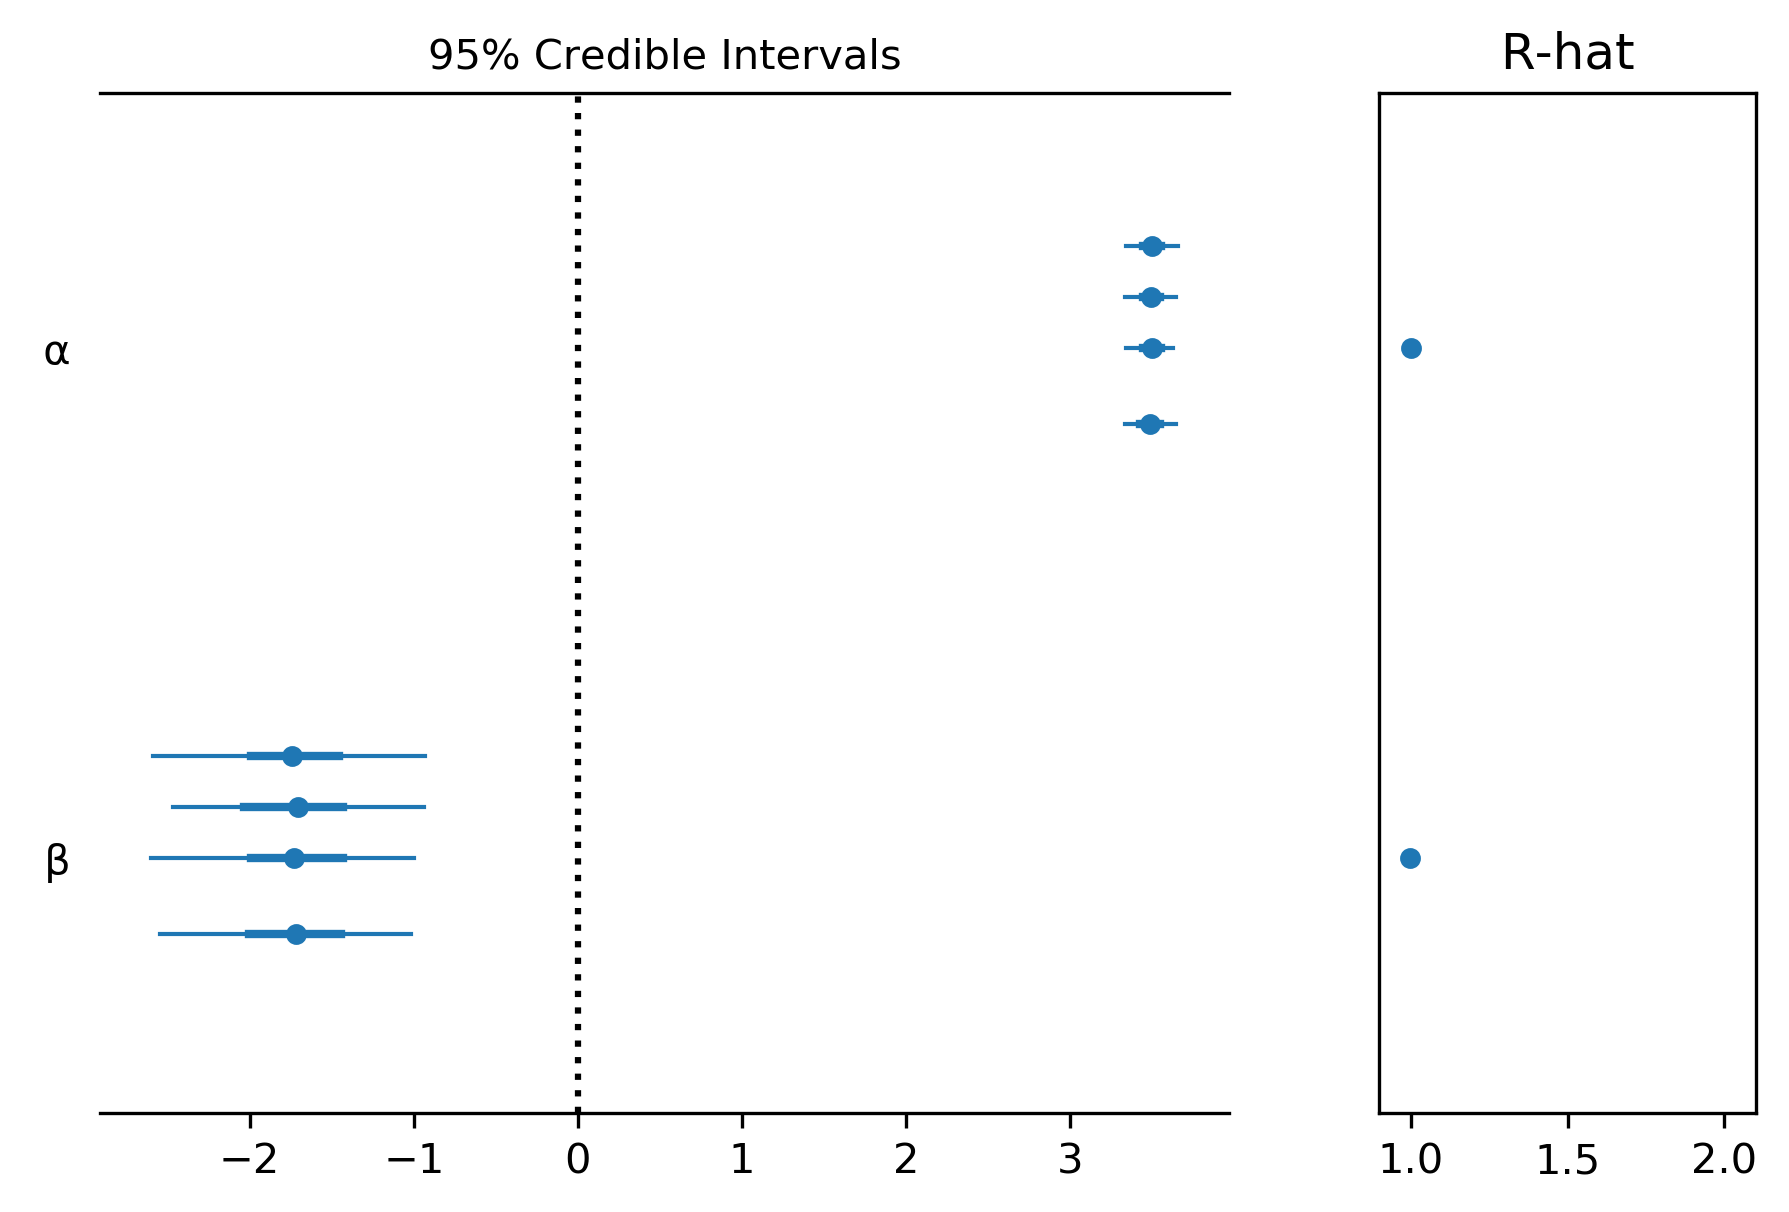

In [10]:
pm.forestplot(t,varnames=['α','β'])
savefig('forestplot')

In [11]:
μ = np.exp(t.α + t.β * (np.log(p).reshape(-1,1) - np.log(p0).mean()))

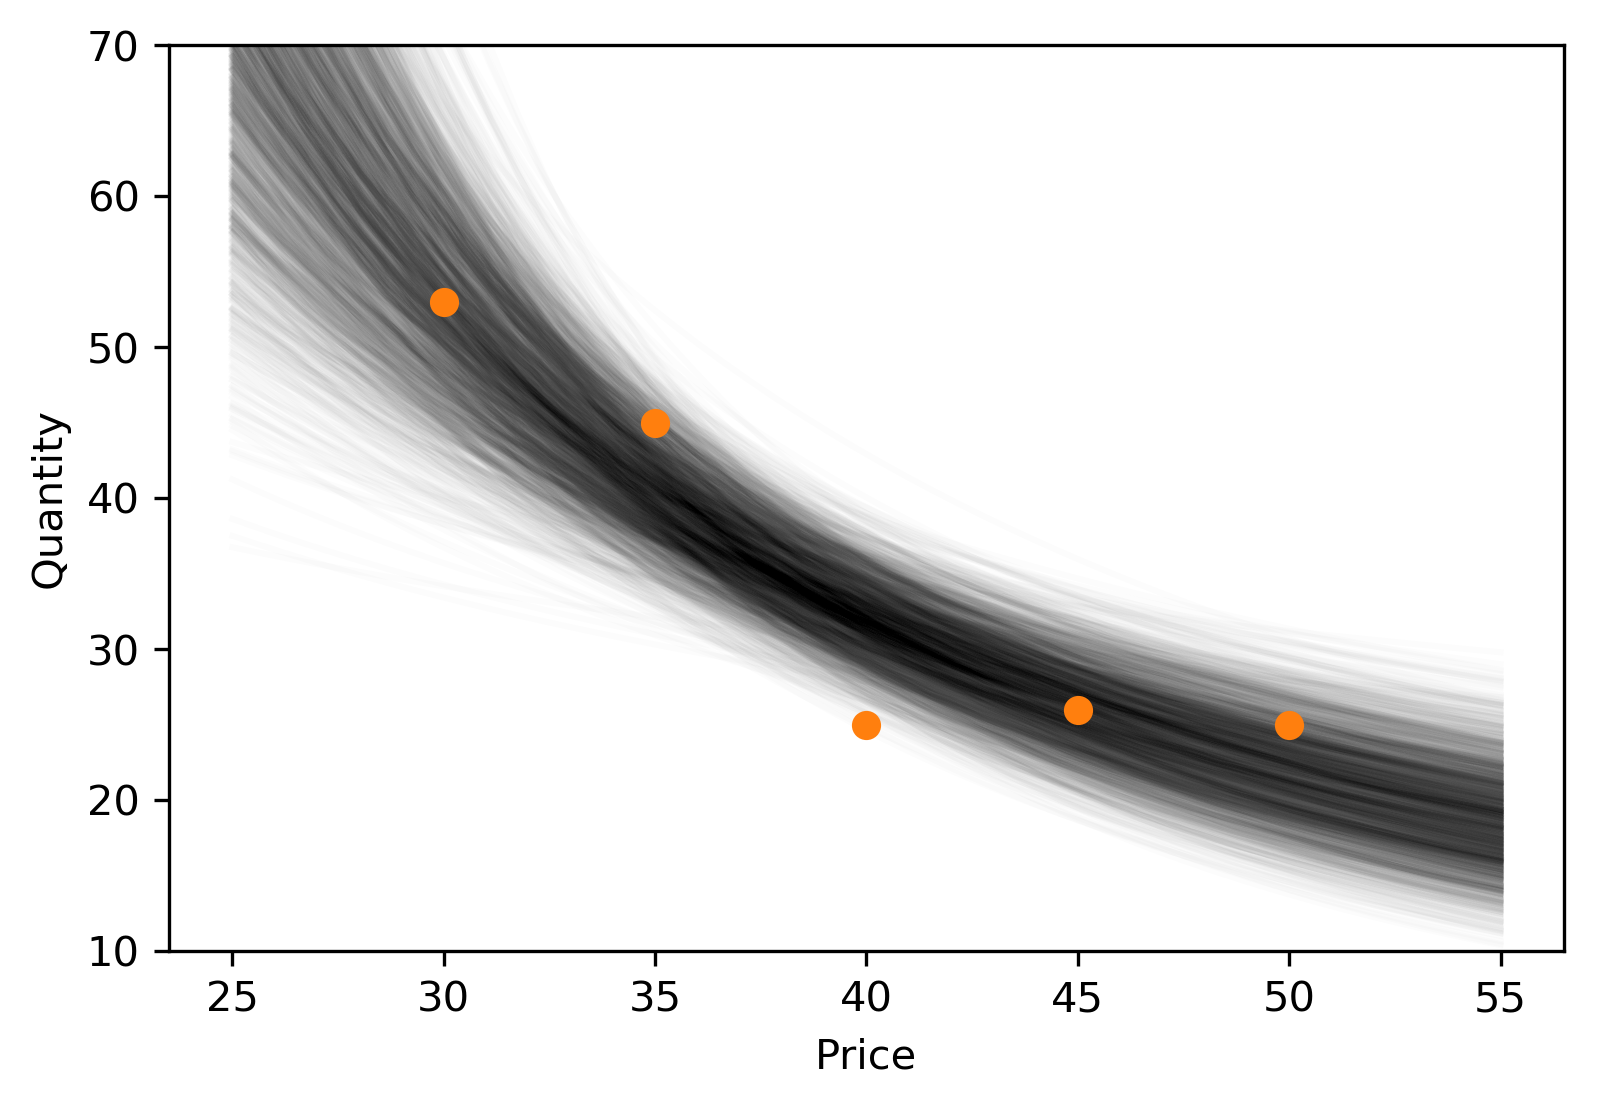

In [12]:
# Checking model fit

plt.plot(p,μ,c='k',alpha=0.01);
plt.plot(p0,q0,'o',c='C1');
#plt.plot(p,eq)
plt.ylim(10,70)
plt.xlabel('Price')
plt.ylabel('Quantity')
savefig("qhat")

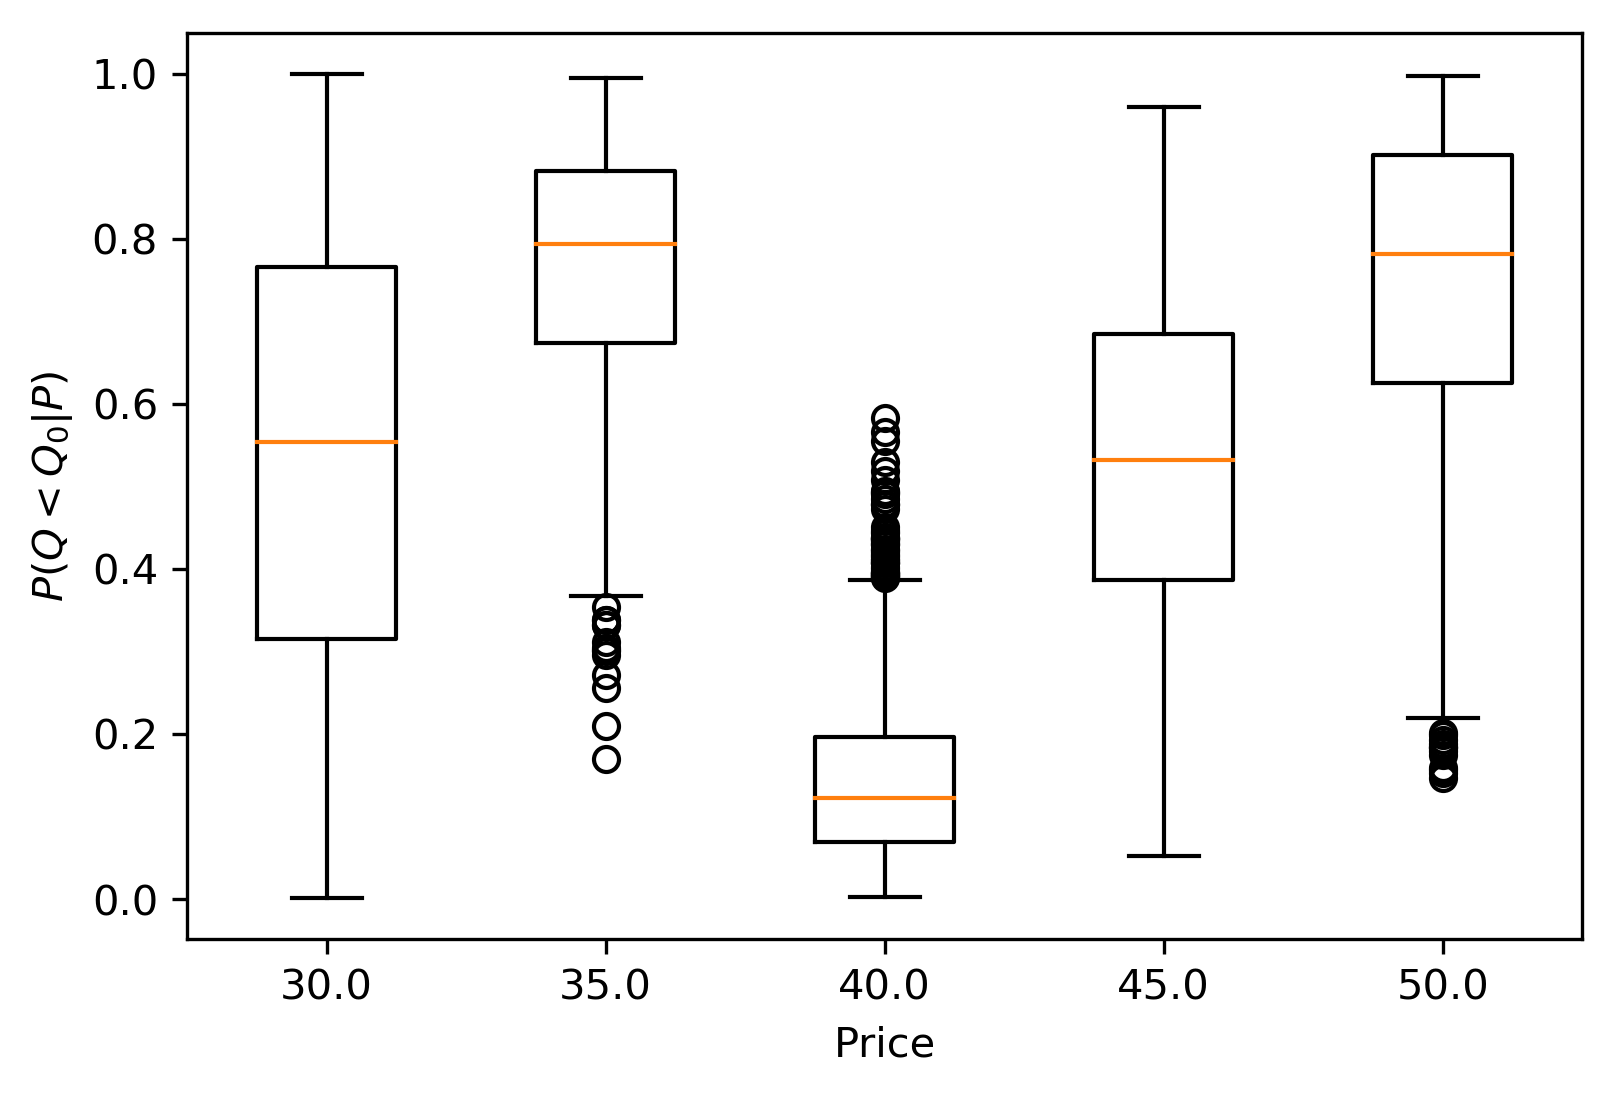

In [13]:
import scipy
plt.boxplot(scipy.stats.poisson.cdf(q0,mu=t['μ0']));
plt.xticks(range(1,6),p0);
plt.xlabel('Price')
plt.ylabel('$P(Q<Q_0 | P)$');
savefig("q0ppc")

In [14]:
import scipy
np.mean(q0  > np.random.poisson(t['μ0']), 0)

array([ 0.5025,  0.709 ,  0.105 ,  0.469 ,  0.6755])

In [15]:
p = np.linspace(25,55)
μ,π = predict(t,p)

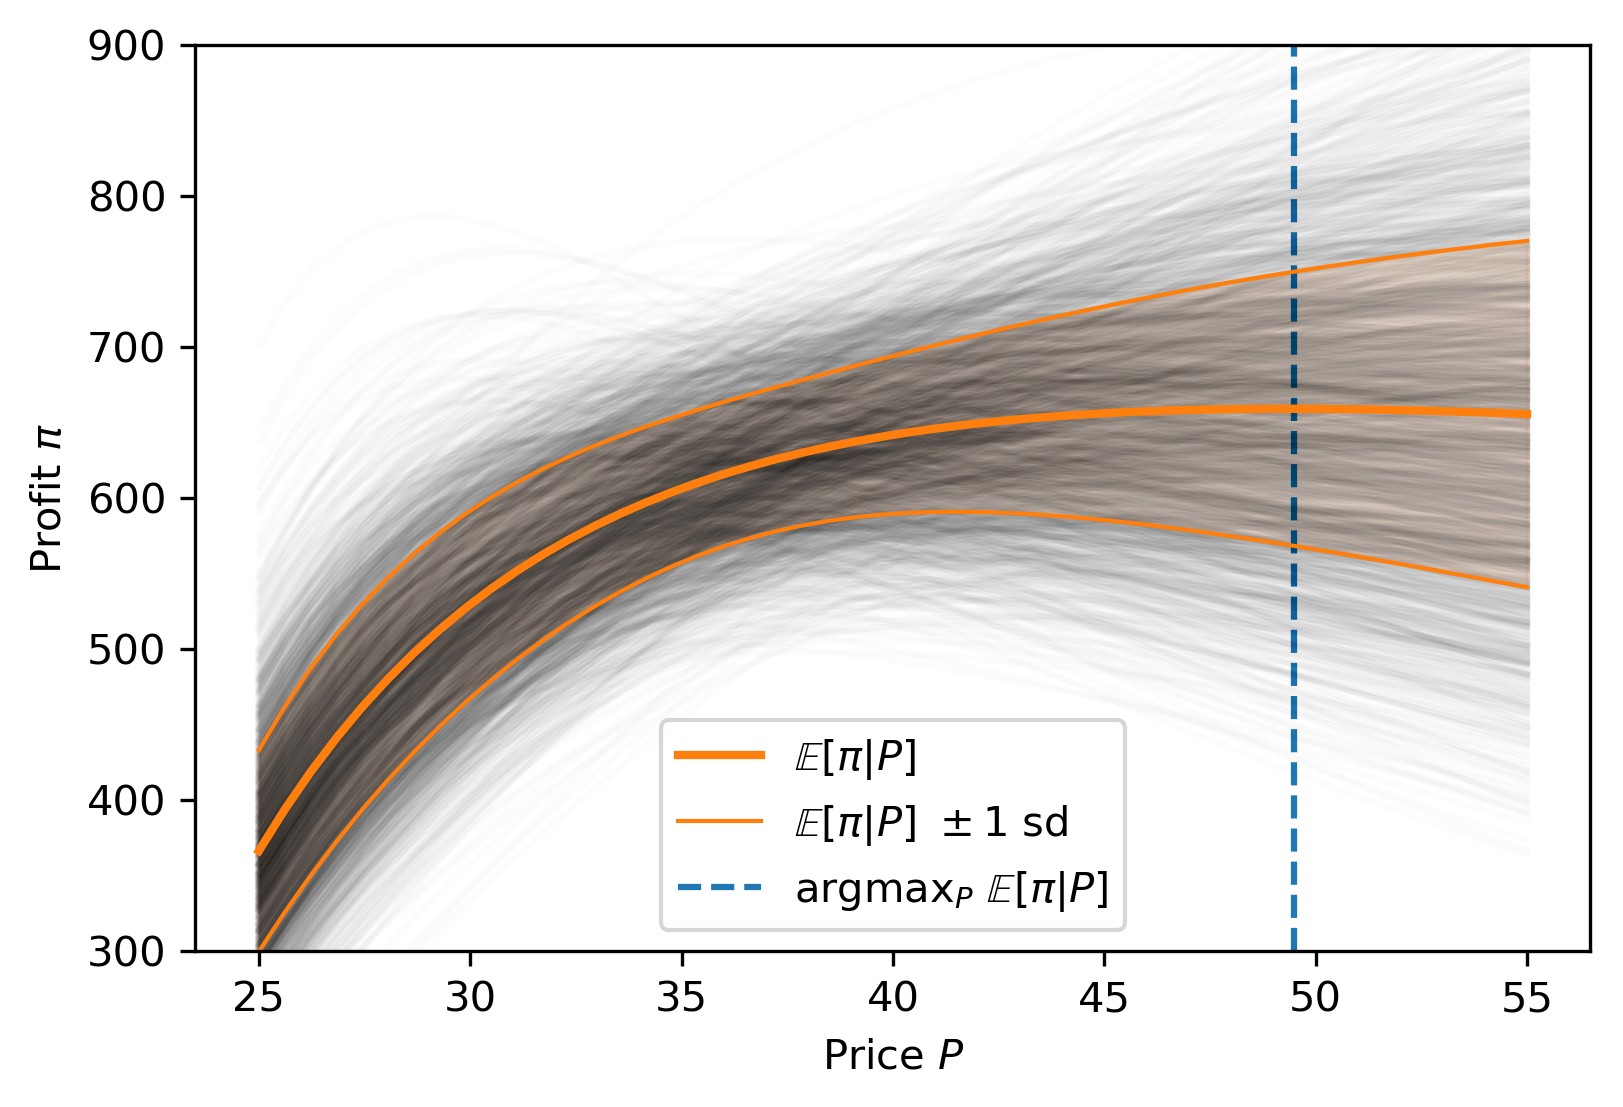

In [16]:
plt.plot(p,π,c='k',alpha=0.01);
plt.plot(p,np.mean(π,1).T,c='C1',lw=2,label="$\mathbb{E}[\pi|P]$");
plt.fill_between(p,(np.mean(π,1)-np.std(π,1)).T,(np.mean(π,1)+np.std(π,1)).T,alpha=0.1,color='C1')
plt.plot(p,(np.mean(π,1)+np.std(π,1)).T,c='C1',lw=1,label="$\mathbb{E}[\pi|P]\ \pm$1 sd");
plt.plot(p,(np.mean(π,1)-np.std(π,1)).T,c='C1',lw=1);
pmax = p[np.argmax(np.mean(π,1))]
plt.vlines(pmax,300,900,colors='C0',linestyles='dashed',label="argmax$_P\ \mathbb{E}[\pi|P]$")
#plt.plot(p,(p - k) * eq)
plt.ylim(300,900);
plt.xlabel("Price $P$")
plt.ylabel("Profit $\pi$")

plt.legend();
savefig("max_of_means")

# Bootstrap

In [17]:
pboot = boot(t,np.linspace(40,60,1000),10000)

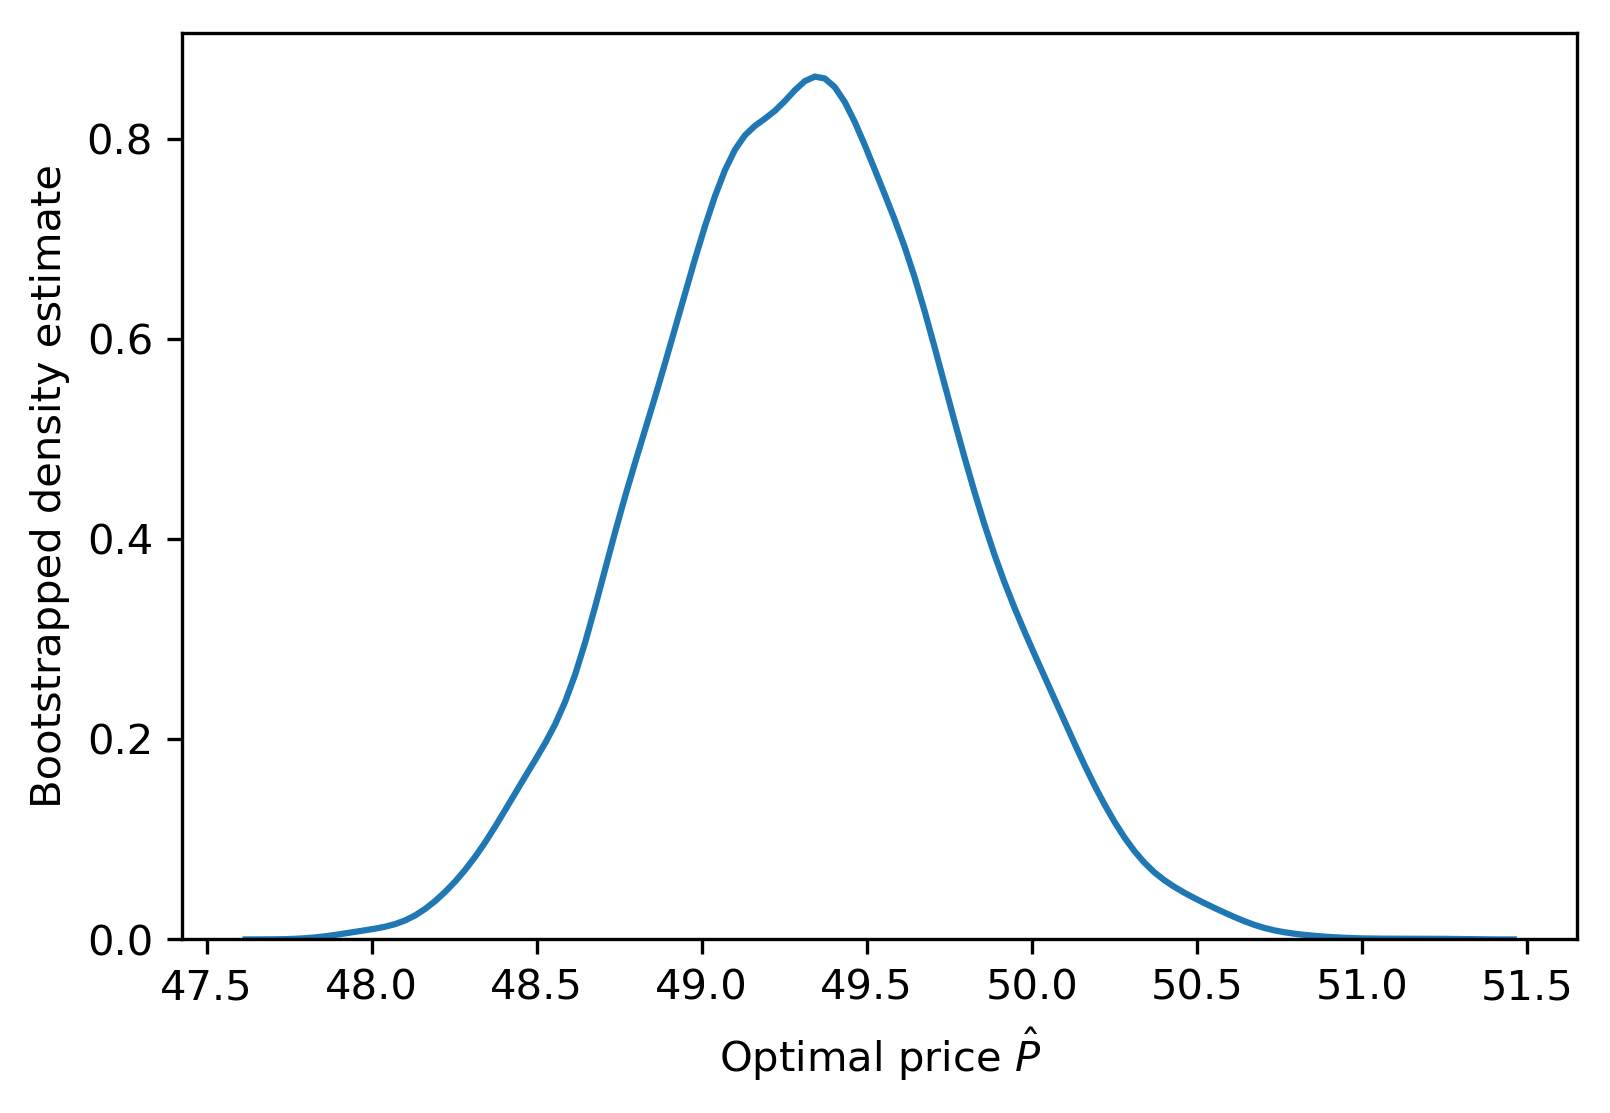

In [18]:
import seaborn as sns
sns.kdeplot(pboot);
plt.xlabel('Optimal price $\hat{P}$')
plt.ylabel('Bootstrapped density estimate');
savefig("boot1")

# Sensitivity Analysis

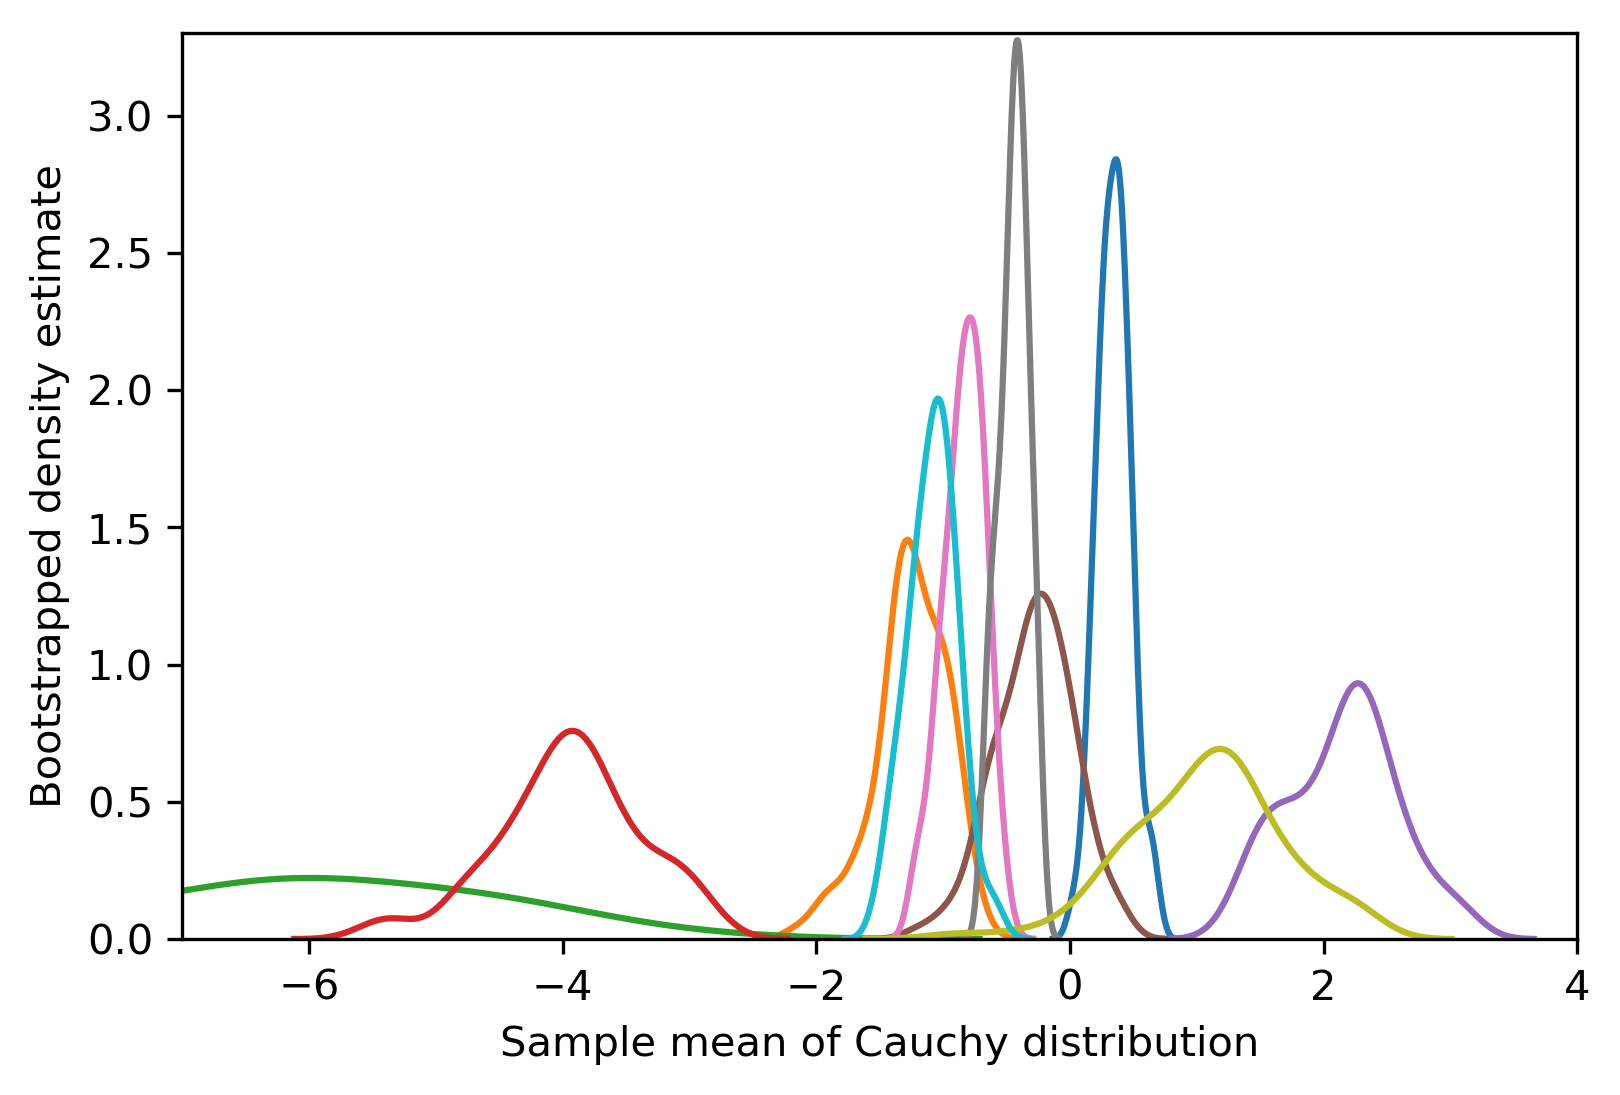

In [19]:

n = 100
k = 2000

np.random.seed(1)
ymax = 0
for j in range(10):
    x = np.random.standard_cauchy(size=n)
    m = np.sort(np.mean(resample(x,n_samples=n*k).reshape(n,k),1))
    sns.kdeplot(m)
plt.xlim(-7,4)
plt.ylim(0,3.3)
plt.xlabel('Sample mean of Cauchy distribution')
plt.ylabel('Bootstrapped density estimate')
savefig('cauchy-bootstrap')

In [20]:
a,b = np.mean(t.α),np.mean(t.β)
a,b

(3.4931666416271372, -1.7288155060911359)

In [21]:
rep = fitrep(p0,np.exp(a + b * (np.log(p0) - logp0mean)),800)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]
100%|██████████| 1000/1000 [00:13<00:00, 73.02it/s]


# now

In [22]:
out1 = withrep(rep,np.logspace(np.log10(20),np.log10(300),1000),max_of_means)

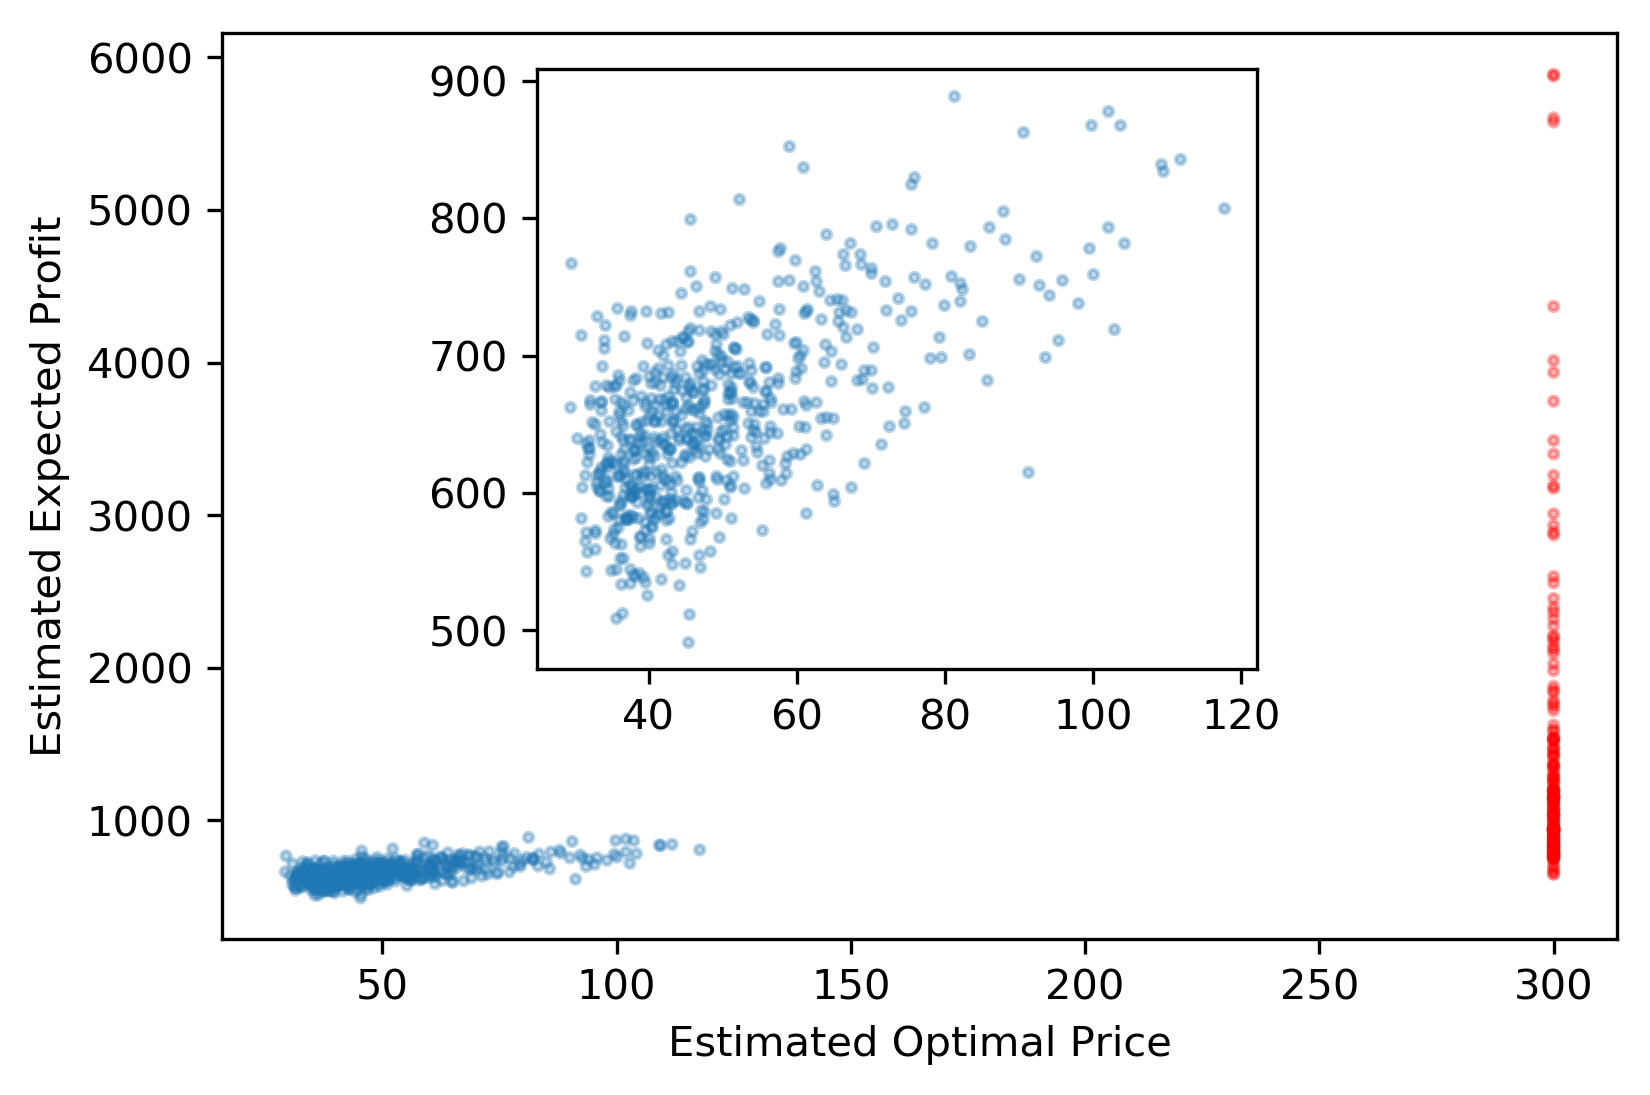

In [23]:
c = np.where(out1[:,0]>300,'red','C0')
ax1 = plt.axes()
ax2 =  plt.axes([0.3,0.35,0.4,0.5])
ax1.scatter(*out1.T,alpha=0.3,s=5,c=c)
#plt.xscale('log')
#plt.yscale('log')
mask = out1[:,0]<200
ax2.scatter(*out1[mask,:].T,alpha=0.3,s=5,c='C0')


ax1.set_xlabel('Estimated Optimal Price')
ax1.set_ylabel('Estimated Expected Profit');
savefig('replications')

In [24]:
scipy.stats.chi2(2).ppf(0.95)

5.9914645471079799

(-4, 1)

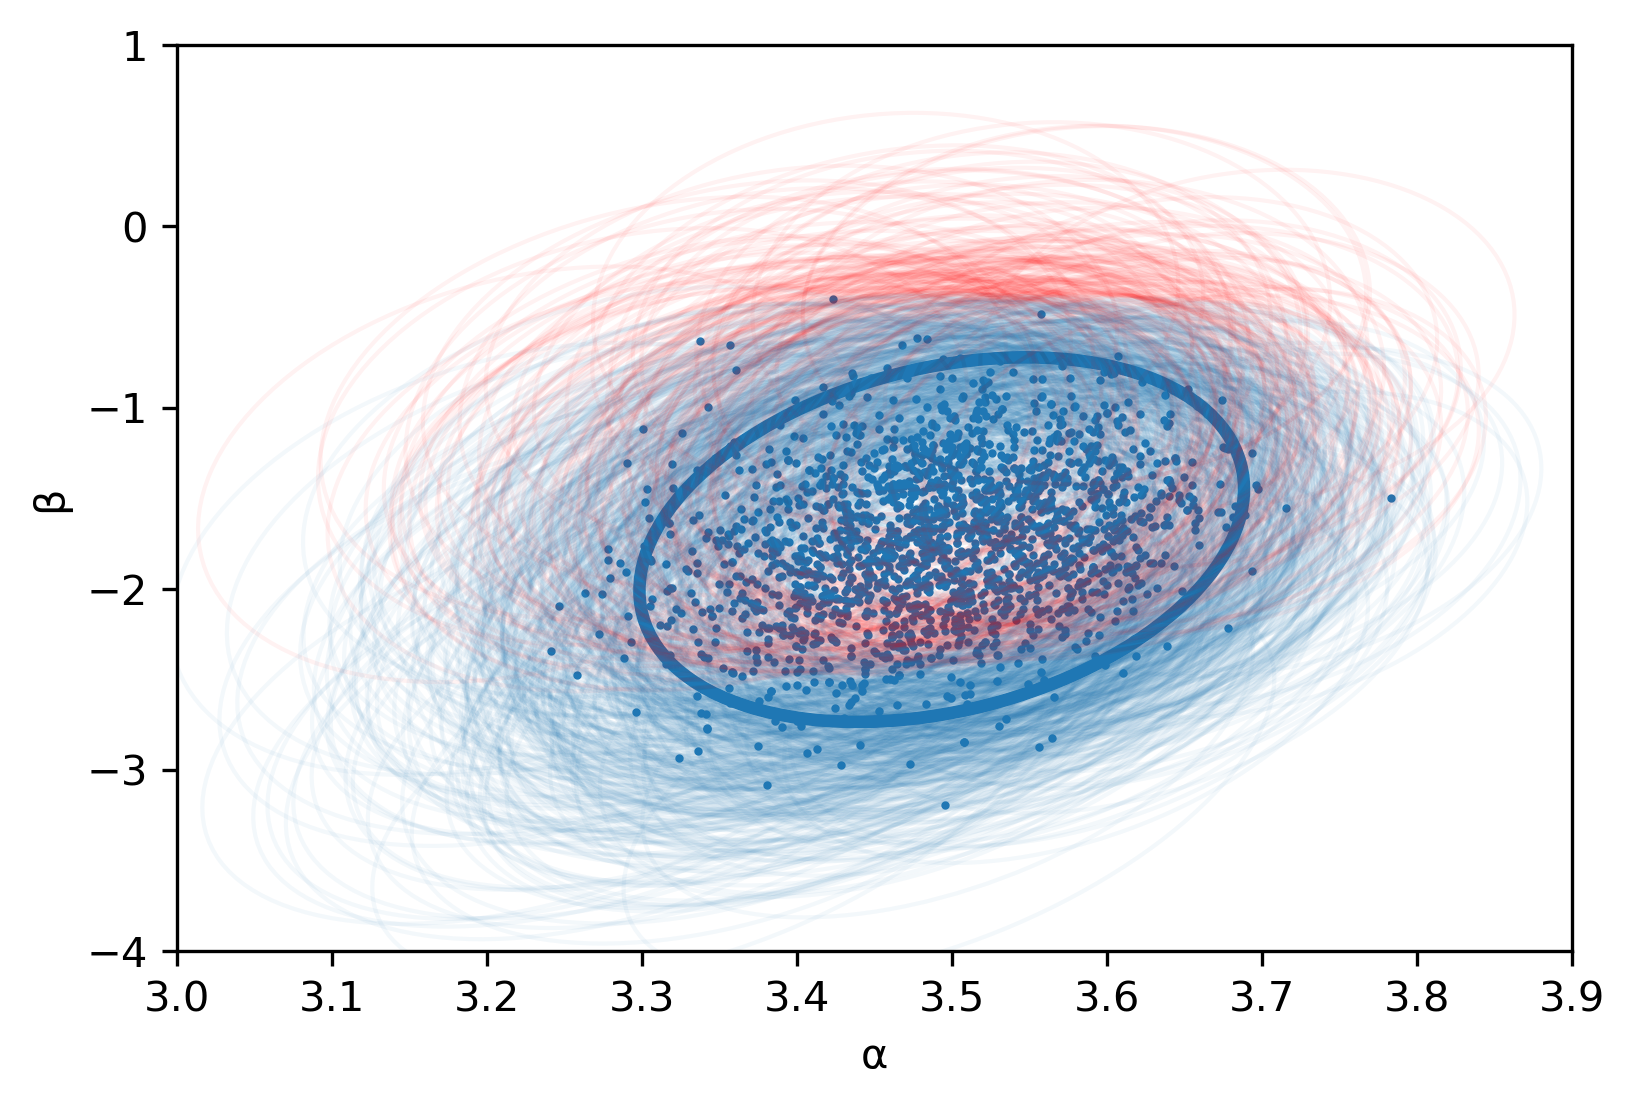

In [25]:
ax = plt.subplot(111)

plt.scatter(t.α,t.β,s=1,c='C0')
mean = (np.mean(t.α),np.mean(t.β))
cov = np.cov(t.α,t.β)
ellipse = normalEllipse(mean,cov,color='C0',lw=3)
ellipse.set_facecolor('none')
ax.add_artist(ellipse)
for j in range(rep.α.shape[1]):
    mean = (np.mean(rep.α[:,j]),np.mean(rep.β[:,j]))
    cov = np.cov(rep.α[:,j],rep.β[:,j])
    ellipse = normalEllipse(mean,cov,alpha=0.05,color=c[j])
    ellipse.set_facecolor('none')
    ax.add_artist(ellipse)
plt.plot(rep.α,rep.β,'.',color='none');
plt.xlabel('α')
plt.ylabel('β');
plt.xlim(3,3.9)
plt.ylim(-4,1)
#savefig("ellipses")

In [26]:
popt = 20*b/(1+b)
popt 

47.441787164033066

In [27]:
np.mean(resample(x))

0.096583335005974588

In [28]:
out2 = withrep(rep,np.logspace(np.log10(20),2.5,1000),median_of_maxes)

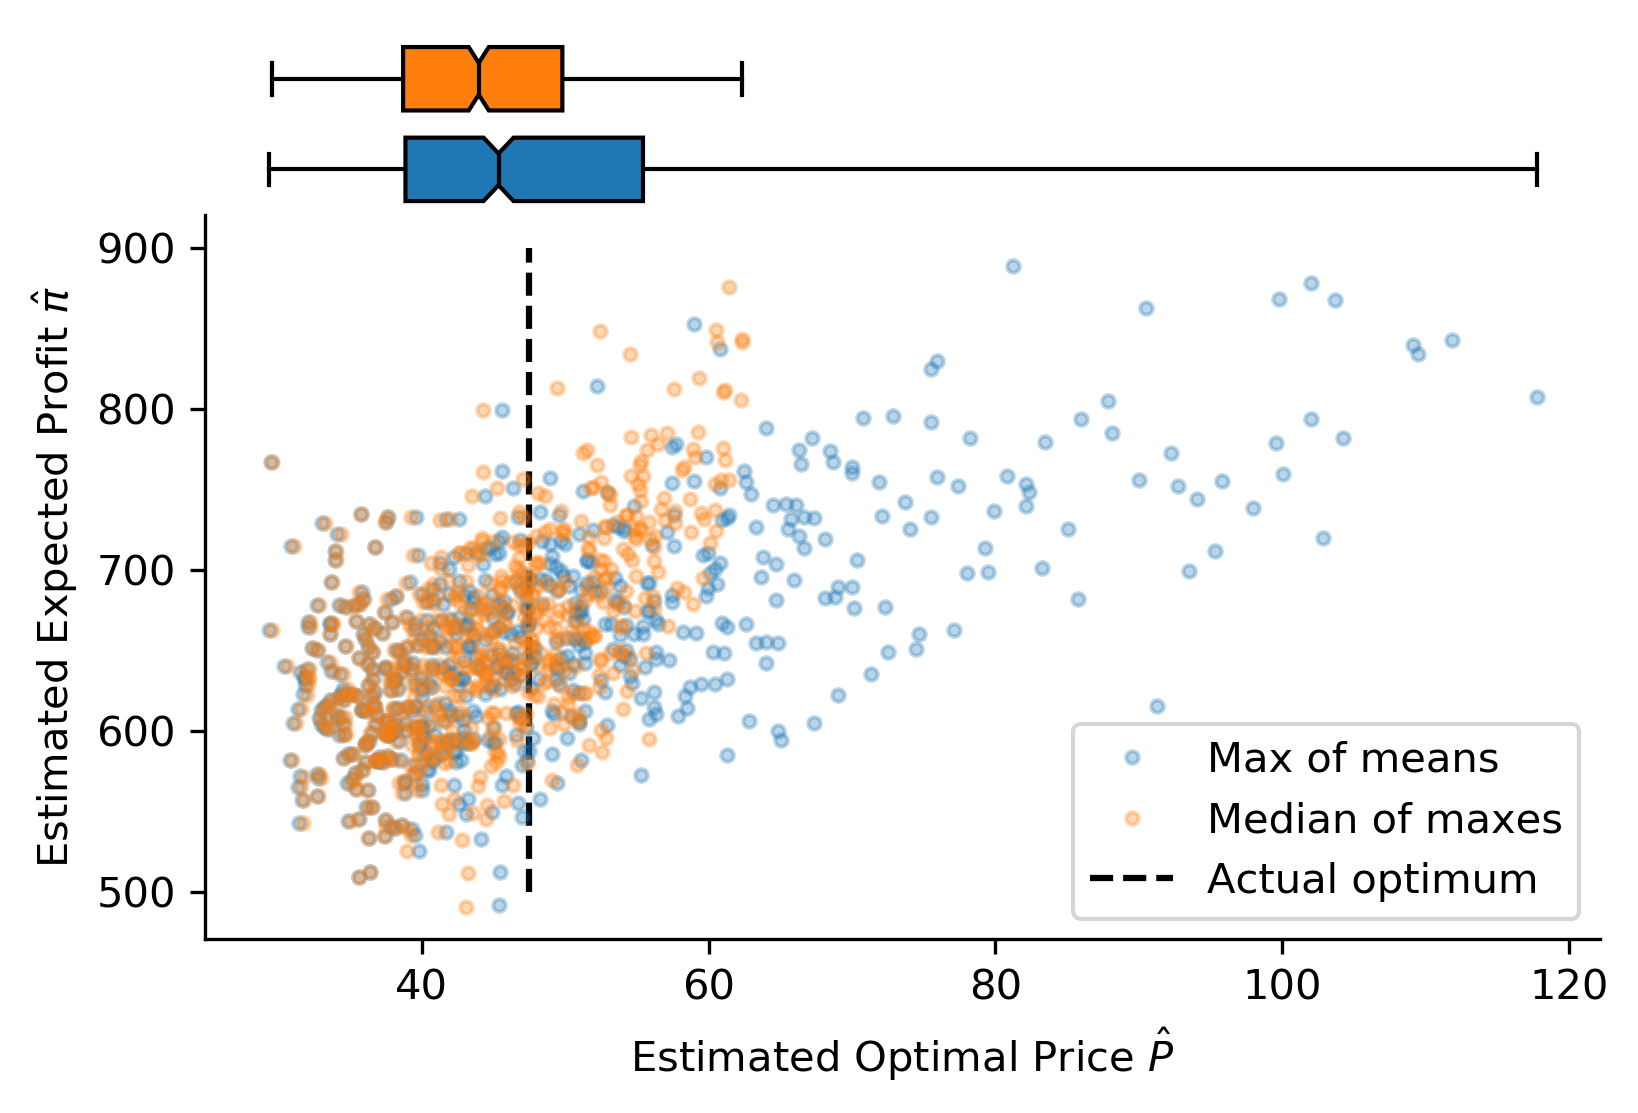

In [30]:
#from matplotlib import gridspec
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw = {'height_ratios':[1, 4]})
# for item in [fig, ax2, ax1]:
#    item.patch.set_visible(False)


#gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 

ax1.set_frame_on(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

s = out1[:,0]<200

colors = ['C0', 'C1']

ax2.plot(*out1[s,:].T,'.',alpha=0.3,
         label="Max of means",
         color=colors[0]
        )
ax2.plot(*out2[s,:].T,'.',alpha=0.3, 
         color=colors[1],
         label='Median of maxes')

ax2.vlines(popt,500,900,label="Actual optimum",linestyles='dashed')
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)


#sns.kdeplot(out1[s,0],shade=True,ax=ax1)
#sns.kdeplot(out2[s,0],shade=True,ax=ax1)
bplot = ax1.boxplot(np.vstack([out1[s,0],out2[s,0]]).T,
                    vert=False,patch_artist=True,notch=True,
                    showfliers=False,widths=0.7,whis=100
                   );
bplot['medians'][0].set_color('k')
bplot['medians'][1].set_color('k')

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax1.set_yticks([])
#ax1.vlines(popt,0,0.045,label="Actual optimum",linestyles='dashed')
#ax1.set_ylim(0,0.045)

plt.xlabel('Estimated Optimal Price $\hat{P}$');
ax2.set_ylabel('Estimated Expected Profit $\hat{\pi}$');
ax2.legend();
savefig('opt-compare')

# Per-estimate optimization

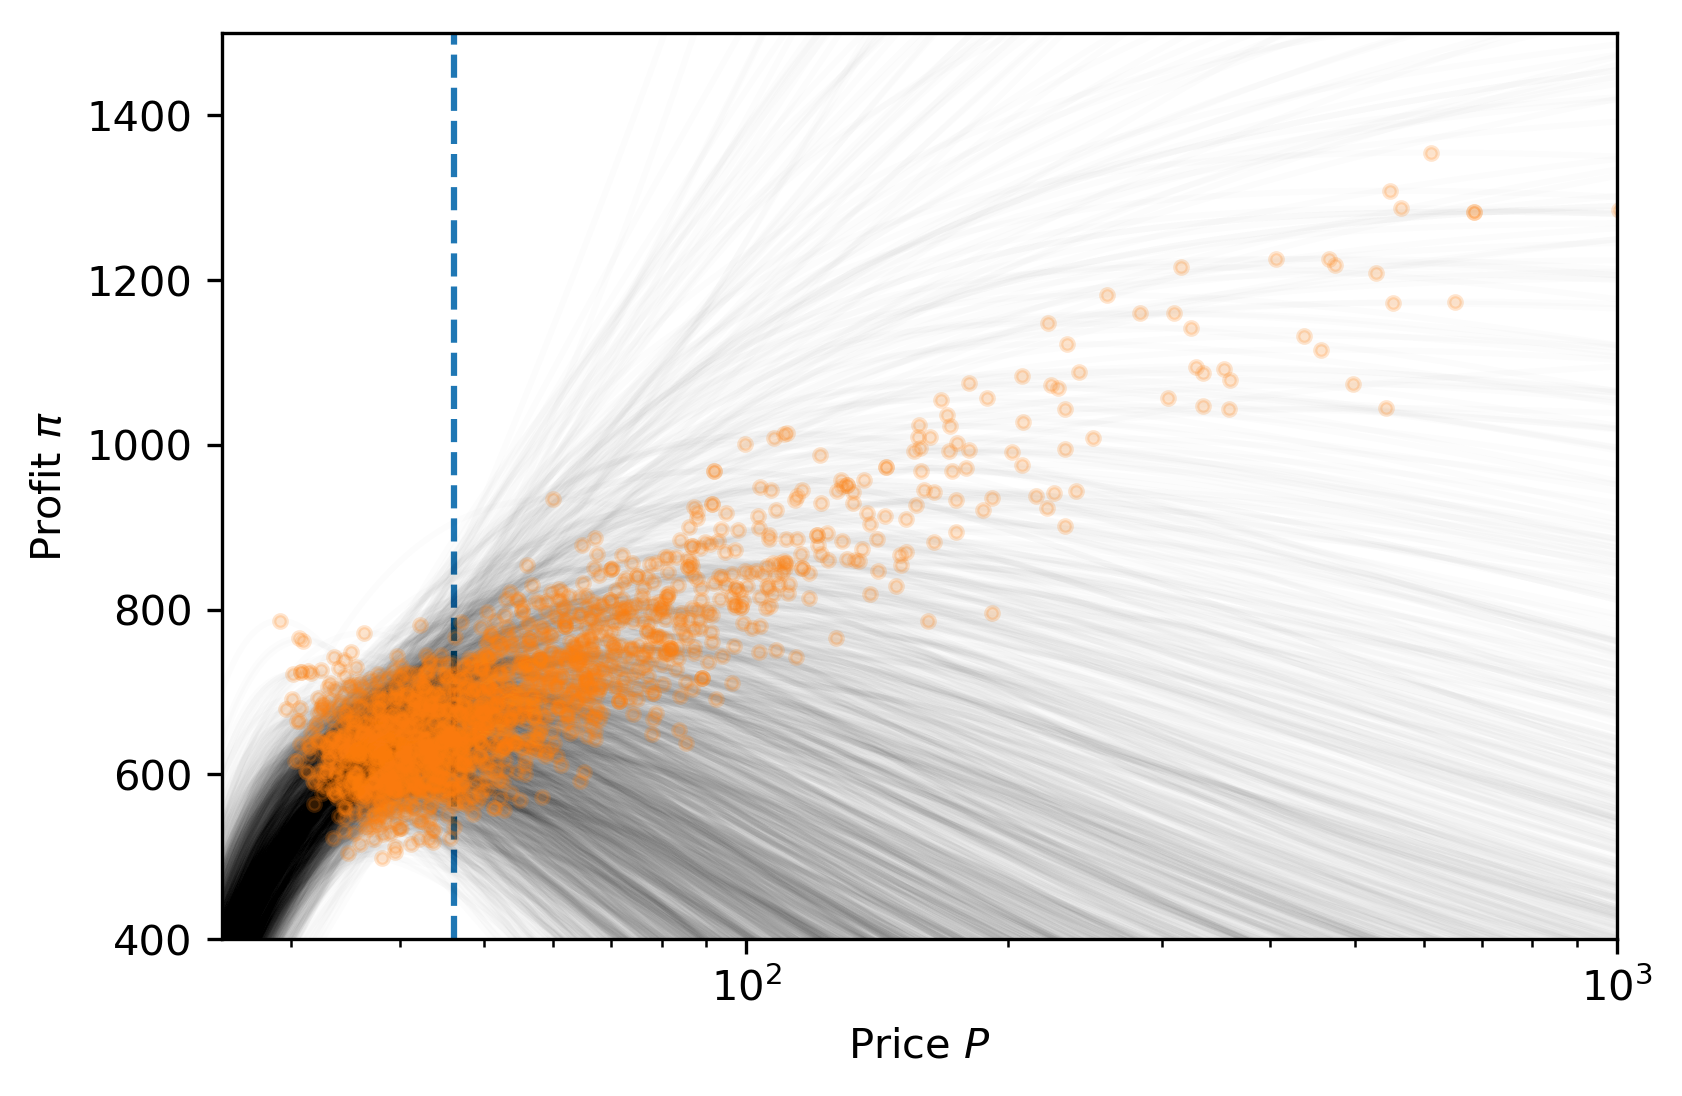

In [32]:
p = np.logspace(np.log10(25),3,1000)
μ,π = predict(t,p)

plt.plot(p,π,c='k',alpha=0.01);
# plt.plot(p,np.mean(π,1).T,c='C1',lw=2,label="$\mathbb{E}[\pi|P]$");
pmax = p[np.argmax(np.mean(π,1))]
#plt.plot(p,(p - k) * eq)

plt.xlabel("Price $P$")
plt.ylabel("Profit $\pi$")



phat = 20*t.β/(1+t.β)
πhat = (phat-20)*(np.exp(t.α + t.β * (np.log(phat) - np.log(p0).mean())))
# plt.hist(phat[s],bins=100);
plt.plot(phat,πhat,'.',alpha=0.2,c='C1')
plt.vlines(np.median(phat),400,1500,colors='C0',linestyles='dashed',label="argmax$_P\ \mathbb{E}[\pi|P]$")

# plt.xlim(20,1000)
# plt.xscale('log')
# plt.xlabel('Optimal Price $\hat{P}$')
# plt.ylabel('Expected Profit at Optimal Price');
plt.xlim(25,1000)
plt.xscale('log')
# plt.yscale('log')
plt.ylim(400,1500);

In [33]:
np.mean(t.β<-1)

0.96199999999999997

In [35]:
np.mean(phat>0)

0.96199999999999997

In [34]:
p_ppc = np.zeros(rep.β.shape[1])
π_ppc = np.zeros(rep.β.shape[1])

# Is this right? Indices seem like they could be way off
p = np.logspace(np.log10(20),2.5,1000)
for i in range(rep.β.shape[1]):
    d = {'α':rep.α[:,i],'β':rep.β[:,i]}
    μ,π = predict(d,p)
    πmean = np.mean(π,1)
    jmax = np.argmax(πmean)
    p_ppc[i] = p[jmax]
    π_ppc[i] = πmean[jmax]